# AI Assignment from Vijayi WFH Technologies Pvt Ltd 

## Task 1

- Objective: Develop a machine learning pipeline that classifies customer support tickets by their issue type and urgency level, and extracts key entities (e.g., product names, dates, complaint keywords). The file (ai_dev_assignment_tickets_complex_1000 ) is provided.

### Data Preparation 

In [85]:
# Importing necessary libraries
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Loading the dataset from the provided file
file_path = 'ai_dev_assignment_tickets_complex_1000.xlsx'
df = pd.read_excel(file_path)

# Initializing the lemmatizer and stop words list for text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess the ticket text
def preprocess_text(text):
    # Convert text to lowercase to maintain uniformity
    text = str(text)
    text = text.lower()

    # Remove punctuation to focus on meaningful words
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Lemmatize each token and remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Return the processed tokens as a string
    return ' '.join(tokens)

# Applying preprocessing to the 'ticket_text' column
df['cleaned_ticket_text'] = df['ticket_text'].apply(preprocess_text)

# Removing rows with missing 'ticket_text'
df = df[df['ticket_text'].notna()]

# Handling missing values in 'urgency_level' and filling with 'Medium'
df['urgency_level'].fillna('Medium', inplace=True)

# Handling missing values in 'issue_type' and filling with 'unspecified'
df['issue_type'].fillna('unspecified', inplace=True)

# Displaying a few rows to check the cleaned data
df[['ticket_id', 'ticket_text', 'cleaned_ticket_text', 'urgency_level']]

,ticket_id,ticket_text,cleaned_ticket_text,urgency_level
0,1,Payment issue for my SmartWatch V2. I was unde...,payment issue smartwatch v2 underbilled order ...,Medium
1,2,Can you tell me more about the UltraClean Vacu...,tell ultraclean vacuum warranty also available...,Medium
2,3,I ordered SoundWave 300 but got EcoBreeze AC i...,ordered soundwave 300 got ecobreeze ac instead...,Medium
3,4,Facing installation issue with PhotoSnap Cam. ...,facing installation issue photosnap cam setup ...,Low
4,5,Order #30903 for Vision LED TV is 13 days late...,order 30903 vision led tv 13 day late ordered ...,Medium
...,...,...,...,...
994,995,Is this item in stock?,item stock,High
995,996,I ordered EcoBreeze AC but got FitRun Treadmil...,ordered ecobreeze ac got fitrun treadmill inst...,High
996,997,I ordered SoundWave 300 but got PowerMax Batte...,ordered soundwave 300 got powermax battery ins...,Low
998,999,Payment issue fr mi SoundWave 300. I was debit...,payment issue fr mi soundwave 300 debited inco...,Low


#### Data Preprocessing and Cleaning

In this section, I performed the following steps:

1. **Data Import**:
   - I loaded the dataset using `pandas.read_excel()` from the provided file and stored it in a DataFrame called `df`.

2. **Text Preprocessing**:
   - I initialized a **lemmatizer** (WordNetLemmatizer) and **stopwords** from NLTK for text preprocessing.
   - The `preprocess_text()` function does the following:
     - **Converts the text to lowercase** to standardize the text.
     - **Removes punctuation** to focus on the meaningful words.
     - **Tokenizes** the text into individual words.
     - **Lemmatizes** the words to their root form (e.g., "running" to "run").
     - **Removes stopwords** (e.g., "the", "and") which don't carry significant meaning.

3. **Handling Missing Data**:
   - I removed rows with missing `ticket_text` values using `df['ticket_text'].notna()`.
   - Missing values in `urgency_level` were filled with the default value **"Medium"**, and missing values in `issue_type` were filled with **"unspecified"**.

4. **Final Output**:
   - I displayed the first few rows with the cleaned columns: `ticket_id`, `ticket_text`, `cleaned_ticket_text`, and `urgency_level`.

This preprocessing ensures that the dataset is clean and ready for further analysis and model building.


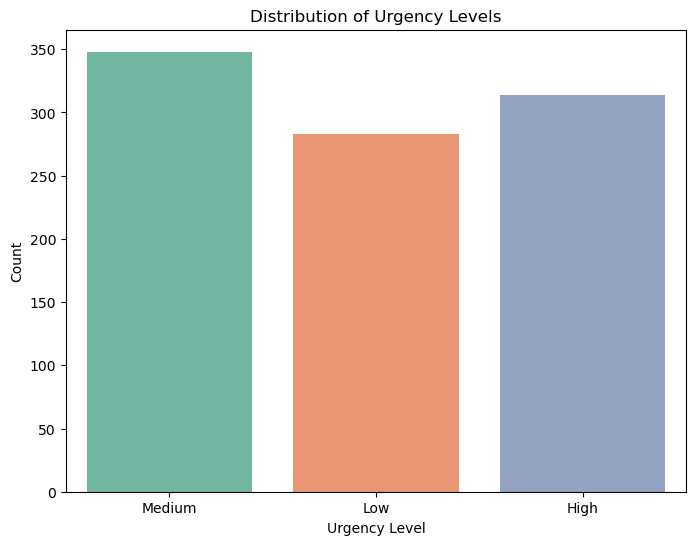

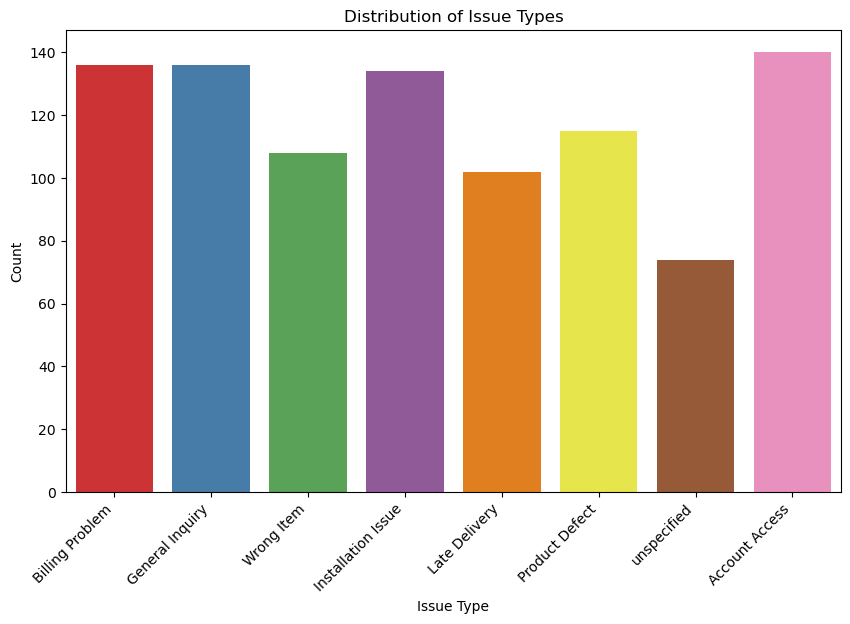

In [86]:
# Importing required libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize the distribution of urgency levels
def plot_urgency_distribution(df):
    # Set the figure size for the plot
    plt.figure(figsize=(8, 6))
    
    # Creating a countplot for 'urgency_level' using seaborn
    sns.countplot(data=df, x='urgency_level', palette="Set2")
    
    plt.title('Distribution of Urgency Levels')
    plt.xlabel('Urgency Level')
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()

# Function to visualize the distribution of issue types
def plot_issue_type_distribution(df):
    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))
    
    # Creating a countplot for 'issue_type' using seaborn
    sns.countplot(data=df, x='issue_type', palette="Set1")
    
    plt.title('Distribution of Issue Types')
    plt.xlabel('Issue Type')
    plt.ylabel('Count')
    
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Calling the functions to visualize the distributions of urgency levels and issue types
plot_urgency_distribution(df)
plot_issue_type_distribution(df)

#### Visualizations for Ticket Data

In this section, I visualized the distribution of urgency levels and issue types using bar plots.

1. **Urgency Level Distribution**:
   - I created a bar plot to show the distribution of **urgency levels** across the tickets using the `countplot()` function from **seaborn**.
   - The plot uses the `Set2` color palette for better visual distinction.
   - The x-axis represents the **urgency level** (e.g., Low, Medium, High), and the y-axis represents the **count** of tickets in each category.

2. **Issue Type Distribution**:
   - I created another bar plot to show the distribution of **issue types** across the tickets using the `countplot()` function from **seaborn**.
   - The plot uses the `Set1` color palette.
   - The x-axis represents different **issue types**, and the y-axis represents the **count** of tickets for each issue type.
   - The x-axis labels are rotated for better readability since some issue types might be long.

These visualizations help understand the distribution of the data, particularly how the tickets are distributed across urgency levels and different issue types.


### Feature Engineering

In [88]:
# Installing the necessary library for sentiment analysis
!pip install textblob

# Importing necessary libraries for feature extraction and sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob

# Initializing the CountVectorizer for Bag-of-Words (BoW) with a limit of 1000 features for efficiency
bow_vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Transform the cleaned ticket text into BoW features
X_bow = bow_vectorizer.fit_transform(df['cleaned_ticket_text'])

# Converting the BoW features to a DataFrame for better visualization
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Initializing the TfidfVectorizer to transform the text into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Transforming the cleaned ticket text into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_ticket_text'])

# Converting the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculation for ticket length (number of characters in the ticket text)
df['ticket_length'] = df['ticket_text'].apply(lambda x: len(str(x)))

# Calculation for sentiment score (positive/negative/neutral sentiment) using TextBlob
df['sentiment'] = df['ticket_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Combining all features (original features and BoW, TF-IDF features) into one DataFrame
df_features = pd.concat([df[['ticket_id', 'urgency_level', 'ticket_length', 'sentiment']], bow_df, tfidf_df], axis=1)

df_features.head()

,ticket_id,urgency_level,ticket_length,sentiment,01,02,03,04,05,06,...,v2,vacuum,vision,want,warranty,white,wit,working,wrong,x1
0,1.0,Medium,71.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.346524,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2.0,Medium,90.0,0.222917,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.440882,0.000000,0.0,0.344747,0.498369,0.0,0.0,0.0,0.0
2,3.0,Medium,80.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,4.0,Low,68.0,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,5.0,Medium,127.0,-0.300000,0.0,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.198077,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


#### Feature Engineering

In this section, I created new features from the ticket text using traditional NLP techniques and added some additional features:

1. **Bag-of-Words (BoW) Vectorization**:
   - I used `CountVectorizer` from `sklearn` to transform the cleaned ticket text into a **Bag-of-Words** representation.
   - To keep the model efficient, I limited the number of features to **1000**.
   - The BoW features were then converted into a DataFrame for better visualization and inspection.

2. **TF-IDF Vectorization**:
   - I applied `TfidfVectorizer` to transform the ticket text into **TF-IDF** (Term Frequency-Inverse Document Frequency) features, which help emphasize important words by reducing the weight of frequently occurring terms.
   - The TF-IDF features were also converted into a DataFrame.

3. **Ticket Length**:
   - I created a new feature called `ticket_length`, which measures the length of the ticket text (in terms of the number of characters). This can help to identify the correlation between the length of a ticket and its urgency or issue type.

4. **Sentiment Analysis**:
   - I used `TextBlob` to calculate the **sentiment** of each ticket text. This sentiment score ranges from **-1 (negative)** to **+1 (positive)**, with **0** representing neutral sentiment.
   
5. **Combining All Features**:
   - Finally, I combined the original ticket data (`ticket_id`, `urgency_level`, etc.) with the newly created features (BoW, TF-IDF, ticket length, and sentiment) into a single DataFrame (`df_features`).
   
   This enriched feature set will be used in downstream machine learning models.


### Multi-Task Learning

In [89]:
# Importing necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

X = X_tfidf  # Using the TF-IDF features as input data for training

# Encoding the labels for issue_type and urgency_level
le_issue = LabelEncoder()  # Encoder for the issue_type column
df['encoded_issue_type'] = le_issue.fit_transform(df['issue_type'])

le_urgency = LabelEncoder()  # Encoder for the urgency_level column
df['encoded_urgency_level'] = le_urgency.fit_transform(df['urgency_level'])

# Defining the target variables for the two classifiers
y_issue = df['encoded_issue_type']  # Target variable for issue type classification
y_urgency = df['encoded_urgency_level']  # Target variable for urgency level classification

# Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_issue, y_test_issue, y_train_urgency, y_test_urgency = train_test_split(X, y_issue, y_urgency, test_size=0.2, random_state=42)

issue_classifier = make_pipeline(LogisticRegression(max_iter=1000))  # Create a logistic regression model pipeline
issue_classifier.fit(X_train, y_train_issue)  # Train the model on the issue type data

y_pred_issue = issue_classifier.predict(X_test)

y_pred_issue = y_pred_issue.flatten()

# Formating target names properly for the classification report
issue_classes = [str(c) for c in le_issue.classes_]

print("Issue Type Classifier Evaluation:")
print(classification_report(y_test_issue, y_pred_issue, target_names=issue_classes))

# Training the Urgency Level Classifier (Logistic Regression)
urgency_classifier = make_pipeline(LogisticRegression(max_iter=1000))  # Create a logistic regression model pipeline
urgency_classifier.fit(X_train, y_train_urgency)  # Train the model on the urgency level data

# Predicting the urgency level on the test set
y_pred_urgency = urgency_classifier.predict(X_test)

# Ensuring y_pred_urgency is a 1D array (flatten if necessary)
y_pred_urgency = y_pred_urgency.flatten()

# Formating target names properly for the urgency level classification report
urgency_classes = [str(c) for c in le_urgency.classes_]

print("Urgency Level Classifier Evaluation:")
print(classification_report(y_test_urgency, y_pred_urgency, target_names=urgency_classes))

Issue Type Classifier Evaluation:
                    precision    recall  f1-score   support

    Account Access       0.92      0.92      0.92        26
   Billing Problem       0.96      1.00      0.98        24
   General Inquiry       0.91      1.00      0.96        32
Installation Issue       0.91      1.00      0.95        29
     Late Delivery       0.96      1.00      0.98        24
    Product Defect       0.81      1.00      0.90        13
        Wrong Item       0.89      1.00      0.94        25
       unspecified       0.00      0.00      0.00        16

          accuracy                           0.90       189
         macro avg       0.80      0.87      0.83       189
      weighted avg       0.84      0.90      0.87       189

Urgency Level Classifier Evaluation:
              precision    recall  f1-score   support

        High       0.48      0.27      0.35        73
         Low       0.32      0.23      0.27        53
      Medium       0.35      0.62      0.45

#### Multi-Task Learning for Issue Type and Urgency Level Classification

In this section, I performed multi-task learning using **Logistic Regression** for both the **issue type classifier** and the **urgency level classifier**. The following steps were performed:

1. **Preparing the Features and Target Variables**:
   - The feature set `X` consists of the **TF-IDF transformed ticket text** (`X_tfidf`).
   - I encoded the labels for **issue_type** and **urgency_level** using **LabelEncoder** from `sklearn`, which transforms the categorical labels into numeric values. These encoded values are stored in `encoded_issue_type` and `encoded_urgency_level` columns.

2. **Data Splitting**:
   - I split the dataset into training and testing sets using `train_test_split` from `sklearn`, where **80%** of the data is used for training and **20%** for testing. This is done separately for both issue types and urgency levels.

3. **Issue Type Classifier (Logistic Regression)**:
   - I trained a **Logistic Regression model** using a pipeline created with `make_pipeline` to classify the **issue type**.
   - The model is trained using the **TF-IDF features** (`X_train`) and the **encoded issue type labels** (`y_train_issue`).
   - After training, I evaluated the model on the test data and printed the **classification report** with precision, recall, and F1-score for each issue type.

4. **Urgency Level Classifier (Logistic Regression)**:
   - I trained another **Logistic Regression model** to classify the **urgency level** using the same pipeline approach.
   - The model was trained on the **TF-IDF features** (`X_train`) and the **encoded urgency labels** (`y_train_urgency`).
   - After training, I evaluated the model on the test data and printed the **classification report** for each urgency level.

These steps help evaluate the model performance for two separate tasks: predicting the issue type and predicting the urgency level of customer support tickets.


Issue Type Classifier Evaluation:


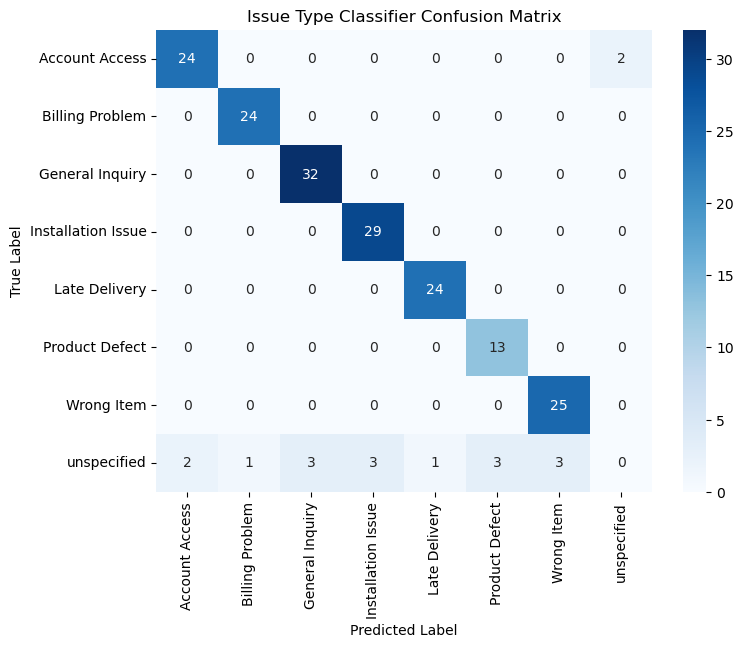

Urgency Level Classifier Evaluation:


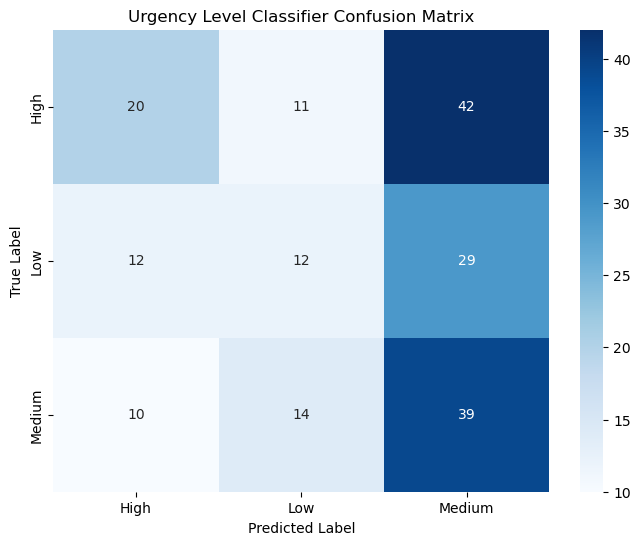

In [91]:
# Importing necessary libraries for evaluation
from sklearn.metrics import confusion_matrix

# Function to plot the confusion matrix for better visualization
def plot_confusion_matrix(cm, labels, title="Confusion Matrix"):
    # Set the figure size for the plot
    plt.figure(figsize=(8, 6))
    
    # Creating the heatmap to visualize the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    plt.show()

# Function to compute and plot confusion matrix for both classifiers
def plot_classification_results(y_test, y_pred, labels, classifier_name):
    # Generating the confusion matrix using true and predicted labels
    cm = confusion_matrix(y_test, y_pred)
    
    # Ploting the confusion matrix using the function defined above
    plot_confusion_matrix(cm, labels, f'{classifier_name} Confusion Matrix')

print("Issue Type Classifier Evaluation:")
plot_classification_results(y_test_issue, y_pred_issue, le_issue.classes_, "Issue Type Classifier")

print("Urgency Level Classifier Evaluation:")
plot_classification_results(y_test_urgency, y_pred_urgency, le_urgency.classes_, "Urgency Level Classifier")

#### Model Evaluation with Confusion Matrix

In this section, I evaluated the performance of the models using the **Confusion Matrix**:


   - The **confusion matrix** is a tool used to assess the performance of a classification model by showing how many instances were correctly or incorrectly predicted for each class.
   - I generated the confusion matrix using the `confusion_matrix()` function from `sklearn.metrics` and visualized it using a **heatmap** created with **seaborn**. The heatmap annotates the matrix with the counts of predicted vs true labels.




### Entity Extraction

In [92]:
# Importing necessary libraries for regular expressions and date handling
import re
from datetime import datetime

# Making List of complaint keywords, including specific issue types and general complaints
issue_type_keywords = df['issue_type'].dropna().unique().tolist()  # Extracting unique issue types from the dataset
other_keywords = ["broken", "not working", "faulty", "damaged", "defective", "malfunctioning",
    "error", "bug", "issue", "problem", "trouble", "difficulty",
    "slow", "lag", "freeze", "crash", "hang", "stuck",
    "late", "delayed", "missing", "lost", "wrong", "incorrect",
    "unable", "cannot", "can't", "won't", "doesn't work",
    "failed", "failure", "down", "offline", "unavailable",
    "expired", "locked", "blocked", "denied", "refused", "Payment Issue"]
complaint_keywords = issue_type_keywords + other_keywords  # Combine the specific issue types and general complaint keywords

# Making List of product keywords, including known products from the dataset and general product names
given_product_keywords = df['product'].dropna().unique().tolist()  # Extracting unique product names from the dataset
other_p_keywords = ['laptop', 'computer', 'desktop', 'pc', 'macbook', 'ipad', 'tablet',
    'phone', 'smartphone', 'iphone', 'android', 'mobile',
    'monitor', 'display', 'screen', 'keyboard', 'mouse', 'webcam',
    'headphones', 'earbuds', 'speaker', 'microphone',
    'printer', 'scanner', 'router', 'modem', 'wifi', 'camera']
product_keywords = given_product_keywords + other_p_keywords  # Combine dataset products and general product names

# Function to extract product names, dates, and complaint keywords from the ticket text
def extract_entities(ticket_text, product_name):
    ticket_text = str(ticket_text)  # Converts NaN or float to string
    
    entities = {
        'products': [],  # List to store product names
        'dates': [],     # List to store dates
        'complaints': [] # List to store complaint keywords
    }
    
    # 1. Extract Product Names from the provided 'product_name'
    for keyword in product_keywords:
        if keyword.lower() in ticket_text.lower():  # Case-insensitive check for product name in ticket text
            entities['products'].append(keyword)
    
    # 2. Extract Dates using a regex pattern for common date formats (e.g., 12/25/2022, 2023-01-01, March 5, 2023)
    date_pattern = r'\b(?:\d{1,2}[/-]\d{1,2}[/-]\d{4}|\d{4}[-/]\d{1,2}[-/]\d{1,2}|[A-Za-z]+\s\d{1,2},\s\d{4})\b'
    dates = re.findall(date_pattern, ticket_text)  # Search for dates using regex pattern
    entities['dates'] = dates  # Store the found dates
    
    # 3. Extract Complaint Keywords (search for keywords in the ticket text)
    for keyword in complaint_keywords:
        if keyword.lower() in ticket_text.lower():  # Case-insensitive check for complaint keywords in ticket text
            entities['complaints'].append(keyword)  # Add the keyword to the complaints list
    
    return entities

# Applying entity extraction to the 'ticket_text' column and use the 'product' column for product names
df['extracted_entities'] = df.apply(lambda row: extract_entities(row['ticket_text'], row['product']), axis=1)

df[['ticket_id', 'ticket_text', 'extracted_entities']].head()

,ticket_id,ticket_text,extracted_entities
0,1,Payment issue for my SmartWatch V2. I was unde...,"{'products': ['SmartWatch V2'], 'dates': [], '..."
1,2,Can you tell me more about the UltraClean Vacu...,"{'products': ['UltraClean Vacuum'], 'dates': [..."
2,3,I ordered SoundWave 300 but got EcoBreeze AC i...,"{'products': ['SoundWave 300', 'EcoBreeze AC']..."
3,4,Facing installation issue with PhotoSnap Cam. ...,"{'products': ['PhotoSnap Cam'], 'dates': [], '..."
4,5,Order #30903 for Vision LED TV is 13 days late...,"{'products': ['Vision LED TV'], 'dates': [], '..."


#### Entity Extraction for Ticket Data

In this section, I extracted key entities from the customer support tickets to understand the content better. The extraction includes the following:

1. **Complaint Keywords**:
   - I created a list of **complaint-related keywords** such as "broken", "faulty", "damaged", "not working", and many others. These keywords represent typical complaints customers might mention in their tickets.
   - Additionally, I included the **issue types** from the `issue_type` column in the dataset as part of the complaint keywords.

2. **Product Names**:
   - I compiled a list of **product keywords**, which include both **known product names** from the `product` column in the dataset (like "laptop", "phone", etc.) and general product names (like "desktop", "tablet", "printer", etc.).
   - This list is used to detect which product is being referred to in the ticket text.

3. **Date Extraction**:
   - I used **regular expressions** (regex) to identify and extract **date** information from the ticket text. The regex pattern looks for common date formats like:
     - `12/25/2022`, `2023-01-01`, or `March 5, 2023`.
   - This helps to identify any dates mentioned in the tickets, which might be relevant for understanding the context or urgency.

4. **Entity Extraction Function**:
   - The function `extract_entities()` takes two inputs: the **ticket text** and the **product name**. 
   - It searches for:
     - **Product names** within the ticket text.
     - **Dates** using a regex pattern.
     - **Complaint keywords** to capture issues mentioned by the customer.
   - It returns a dictionary containing the extracted **products**, **dates**, and **complaints**.

5. **Applying the Extraction**:
   - I applied the `extract_entities()` function to each row in the dataset using `df.apply()`, extracting relevant entities for every ticket.
   - The result is stored in the new column `extracted_entities`.

This process helps in identifying key pieces of information from the ticket text that can be used in further analysis or model training.


### Integration

In [93]:
# Importing the json library to format the output as JSON
import json

# Function to integrate everything: predicting issue type, urgency, and extracting entities
def integrate_ticket_info(ticket_text):
    cleaned_text = preprocess_text(ticket_text)  # Preprocess to remove punctuation, lemmatize, etc.
    
    X_input = tfidf_vectorizer.transform([cleaned_text])  # Transform text into TF-IDF features
    
    predicted_issue = issue_classifier.predict(X_input)[0]  # Predict issue type
    predicted_urgency = urgency_classifier.predict(X_input)[0]  # Predict urgency level
    
    issue_type = le_issue.inverse_transform([predicted_issue])[0]  # Decode predicted issue type
    urgency_level = le_urgency.inverse_transform([predicted_urgency])[0]  # Decode predicted urgency level
    
    extracted_entities = extract_entities(ticket_text, product_name=None)  # Let entity extraction handle product names automatically
    
    result = {
        'predicted_issue_type': issue_type,
        'predicted_urgency_level': urgency_level,
        'extracted_entities': extracted_entities
    }
    
    return json.dumps(result, indent=4)

#### Integrating Predictions and Entity Extraction

In this section, I created a function to process a given ticket and return predictions for both **issue type** and **urgency level**, as well as extracted **entities** such as product names, complaint keywords, and dates.

1. **Preprocessing the Ticket Text**:
   - The `ticket_text` is first **preprocessed** using the `preprocess_text()` function, which handles tasks such as converting the text to lowercase, removing punctuation, tokenizing the text, and lemmatizing the words.

2. **Vectorizing the Text**:
   - The cleaned ticket text is then transformed into **TF-IDF features** using the `tfidf_vectorizer`. This converts the text into numerical features that can be used by the machine learning models for prediction.

3. **Issue Type and Urgency Level Predictions**:
   - The model then predicts the **issue type** (e.g., "Payment Issue") and the **urgency level** (e.g., "High") using the trained classifiers (`issue_classifier` and `urgency_classifier`).
   - These predictions are based on the features generated from the ticket text.

4. **Decoding Predictions**:
   - The predicted numerical values for both the **issue type** and **urgency level** are decoded back into their original labels (e.g., "Payment Issue" for issue type and "High" for urgency level) using the **label encoders**.

5. **Entity Extraction**:
   - The `extract_entities()` function is used to extract key entities from the ticket text, including:
     - **Product names**: Identifying products mentioned in the ticket (e.g., "laptop").
     - **Dates**: Extracting any date references in the ticket.
     - **Complaint keywords**: Identifying keywords related to complaints (e.g., "broken", "not working").

6. **Returning the Results**:
   - The function compiles the **predicted issue type**, **predicted urgency level**, and the **extracted entities** into a structured dictionary.
   - The dictionary is then converted to a **JSON-formatted string** for easy visualization and processing.

This integration allows for seamless prediction and entity extraction in a single function, providing a complete output for each ticket processed.


### Gradio Interfaces (single and batch tickets processing)

In [94]:
# Installing Gradio for creating the interactive web app
!pip install gradio

# Importing the necessary library to create the Gradio interface
import gradio as gr

# Function to integrate everything: predicting issue type, urgency, and extracting entities
def gradio_interface(ticket_text):
    # Call the integrate_ticket_info function to get predictions and extracted entities
    result = integrate_ticket_info(ticket_text)  # Process the ticket text
    return result  # Return the result as JSON

# Gradio interface for ticket text input and output display
iface = gr.Interface(
    fn=gradio_interface,  # The function to call for prediction
    inputs=gr.Textbox(label="Ticket Text", placeholder="Enter raw ticket text here..."),  # Input field for ticket text
    outputs=gr.JSON(label="Predictions and Extracted Entities"),  # Output display for predictions and entities in JSON format
    live=True,  # Set to True to enable real-time updates as you type
    title="Customer Support Ticket Classifier",  # Title for the interface
    description="Enter a raw customer support ticket text to see the predicted issue type, urgency level, and extracted entities such as product names, dates, and complaints."  # Description of the interface
)

iface.launch()  # Launch the Gradio interface

* Running on local URL:  http://127.0.0.1:7868
* To create a public link, set `share=True` in `launch()`.


#### Creating an Interactive Gradio Interface for Ticket Classification

In this section, I created an interactive **Gradio web interface** that allows users to input raw customer support ticket text and get predictions for the issue type, urgency level, and extracted entities such as product names, dates, and complaints. The interface integrates the `integrate_ticket_info()` function for processing the text and displaying the results.

#### Key Steps:

1. **Gradio Interface Setup**:
   - I used **Gradio** to build an interface that accepts raw customer support ticket text as input. The user can type or paste ticket text in the provided text box.
   - The function `gradio_interface()` calls the `integrate_ticket_info()` function to process the ticket text, predict the issue type, urgency level, and extract entities (product names, complaint keywords, and dates).

2. **Input Field**:
   - The input field is a **textbox** where users can enter the ticket text. A **placeholder** guides users on what to input.
   
3. **Output**:
   - The output is displayed in **JSON format**, showing the predicted issue type, urgency level, and the extracted entities. This allows users to see the results in a structured and easy-to-read format.

4. **Live Updates**:
   - The interface is set to **live** mode, meaning the predictions and entities are updated in real-time as the user types the ticket text.

5. **Interface Launch**:
   - The `iface.launch()` command launches the web interface, which can be accessed through a local web server. The user interacts with the interface to input tickets and see the processed results.

In [95]:
# Function to handle batch processing of multiple tickets correctly
def integrate_batch_ticket_info(ticket_texts):
    # Ensuring the input is correctly split into individual ticket texts (by newlines or commas)
    if isinstance(ticket_texts, str):
        # If input is a string, split it by newlines to handle multiple tickets
        ticket_texts = ticket_texts.split('\n')
    elif isinstance(ticket_texts, list):
        # If input is a list, strip any leading or trailing whitespace from each ticket
        ticket_texts = [ticket.strip() for ticket in ticket_texts if ticket.strip()]  # Clean any empty tickets
    
    results = []  
    i = 0  # Counter to keep track of ticket number
    
    # Loop through each ticket text in the input
    for ticket_text in ticket_texts:
        i += 1  # Increment ticket number
        
        cleaned_text = preprocess_text(ticket_text)
        
        X_input = tfidf_vectorizer.transform([cleaned_text])  # Convert text to numerical features
        
        predicted_issue = issue_classifier.predict(X_input)[0]  # Predict the issue type
        predicted_urgency = urgency_classifier.predict(X_input)[0]  # Predict the urgency level
        
        issue_type = le_issue.inverse_transform([predicted_issue])[0]  # Decode the predicted issue type
        urgency_level = le_urgency.inverse_transform([predicted_urgency])[0]  # Decode the predicted urgency level
        
        extracted_entities = extract_entities(ticket_text, product_name=None)  # Extract relevant entities from the text
        
        result = {
            'ticket_no': i,  # Add ticket number for tracking
            'predicted_issue_type': issue_type,  # Store the predicted issue type
            'predicted_urgency_level': urgency_level,  # Store the predicted urgency level
            'extracted_entities': extracted_entities  # Store the extracted entities
        }
        
        results.append(result)  # Add the result to the results list
    
    return results 

#### Batch Processing for Multiple Tickets

In this section, I implemented a function to handle the batch processing of multiple customer support tickets. This function allows for processing several tickets at once and returning the predicted **issue type**, **urgency level**, and **extracted entities** (such as product names, complaint keywords, and dates).

#### Key Steps:

1. **Input Handling**:
   - The function accepts either a **string** or a **list** of tickets:
     - If the input is a **string**, it splits the text by **newlines** (`\n`), assuming each line represents a separate ticket.
     - If the input is already a **list**, it strips any leading or trailing whitespace from each ticket and removes any empty tickets.

2. **Preprocessing and Vectorization**:
   - Each ticket is **preprocessed** using the `preprocess_text()` function. This step involves text cleaning, including:
     - Converting the text to lowercase.
     - Removing punctuation.
     - Tokenizing the text and lemmatizing words.
   - After preprocessing, the **TF-IDF vectorizer** is used to convert the cleaned text into numerical features suitable for prediction.

3. **Model Prediction**:
   - **Issue Type** and **Urgency Level** are predicted for each ticket using the pre-trained classifiers (`issue_classifier` and `urgency_classifier`).
   - The **predicted numerical values** are decoded back into their original labels (e.g., "Payment Issue" for issue type and "High" for urgency level) using **label encoders**.

4. **Entity Extraction**:
   - The function `extract_entities()` is used to identify relevant entities from the ticket text, such as:
     - **Product names** (e.g., "Laptop", "Printer").
     - **Dates** (e.g., "2023-06-17").
     - **Complaint keywords** (e.g., "broken", "not working").

5. **Result Compilation**:
   - For each ticket, the **ticket number**, **predicted issue type**, **predicted urgency level**, and **extracted entities** are stored in a dictionary.
   - The results for all tickets are stored in a list, which is returned at the end of the function.

### Example Output:

For a batch of tickets, the output might look like this:

```json
[
  {
    "ticket_no": 1,
    "predicted_issue_type": "Payment Issue",
    "predicted_urgency_level": "High",
    "extracted_entities": {
      "products": ["Laptop"],
      "dates": ["2023-06-17"],
      "complaints": ["broken", "not working"]
    }
  },
  {
    "ticket_no": 2,
    "predicted_issue_type": "Technical Issue",
    "predicted_urgency_level": "Medium",
    "extracted_entities": {
      "products": ["Printer"],
      "dates": ["2023-06-18"],
      "complaints": ["missing", "not working"]
    }
  }
]


In [96]:
# Gradio Interface for batch processing
def gradio_batch_interface(ticket_texts):
    results = integrate_batch_ticket_info(ticket_texts)
    
    # Converting the results into a DataFrame for easier visualization
    results_df = pd.DataFrame(results)
    
    return results_df

# Gradio interface for batch processing of multiple tickets
iface = gr.Interface(
    fn=gradio_batch_interface,  # The batch processing function
    inputs=gr.Textbox(label="Input Multiple Ticket Texts", placeholder="Enter raw ticket texts separated by newline...", lines=10),  # Input: Textbox for entering multiple ticket texts
    outputs=gr.DataFrame(label="Batch Prediction Results"),  # Output: Display the results in a DataFrame format
    live=True,  # Set live=True to update the results in real-time as the user types
    title="Customer Support Ticket Classifier - Batch Processing",  # Title for the Gradio interface
    description="Input multiple raw customer support ticket texts (separated by newline or commas) to see the predicted issue type, urgency level, and extracted entities."  # Description of the interface
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7869
* To create a public link, set `share=True` in `launch()`.


#### Gradio Interface for Batch Processing of Customer Support Tickets

In this section, I created a **Gradio interface** to handle **batch processing** of customer support tickets. This interface allows users to input multiple raw ticket texts and view the predicted **issue type**, **urgency level**, and **extracted entities** for each ticket.

#### Key Steps:

1. **Input**:
   - The user can input **multiple ticket texts** in the provided **textbox**. The tickets should be separated by **newlines** (or commas if preferred). The input is processed as a single string that contains all the ticket texts, each separated by a newline.
   
2. **Batch Processing**:
   - The `gradio_batch_interface()` function takes the input text, processes it with the **`integrate_batch_ticket_info()`** function, and returns the results in a **DataFrame**. This makes it easier to view and analyze the results.

3. **Output**:
   - The results are displayed in a **DataFrame format** that shows predictions for **issue type**, **urgency level**, and **extracted entities** (e.g., product names, complaint keywords, and dates).

4. **Real-Time Updates**:
   - With the **live=True** parameter, the results are updated in real-time as the user types or modifies the input.

5. **Interface Details**:
   - The Gradio interface has a **title** ("Customer Support Ticket Classifier - Batch Processing") and a **description**, explaining to the user what the interface does.
   
6. **Example Output**:
   - After the user enters multiple tickets, the results will be shown in a table-like format, where each row represents the results for a ticket, and columns include the **ticket number**, **predicted issue type**, **predicted urgency level**, and **extracted entities**.

